In [2]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})

import os

In [3]:
exposure_time = {
    "17.4" : 15557,
    "35" : 4393,
    "20" : 3258,
    "45" : 5386,
    "25" : 2408,
    "40" : 2191,
}

colors = {
    "17.4" : "#f21821",
    "20" : "#f8631f",
    "25" : "#fa931a",
    "35" : "#ffc309",
    "40" : "#fff600",
    "45" : "#cdde25",
}

 Red
#f21821
Orange Red
#f8631f
Orange
#fa931a
Orange Yellow
#ffc309
Yellow
#fff600
Yellow Green
#cdde25
Green
#8bc83b
Blue Green
#04b99e
Blue
#01aef3
Blue Purple
#5954a8
Purple
#8f59a7
Purple Red
#bf168d 

In [4]:
matplotlib.rcParams.update({
    'figure.figsize': [8, 4],
})

In [5]:
def get_df_from_filename(filename, time_lims = [1.5, 15]):
    with open(filename, "r") as file:
        raw_lines = file.read()
        raw_samples = raw_lines.split("#")

        text_info = [" ".join(i.split()) for i in raw_samples[1:6]]
        resolution = float((text_info[4].split()[-1]).replace(",", "."))

        hist = np.array(raw_samples[6].split()[1:], dtype=int)
        n = len(hist)
        time = resolution * np.arange(1, n + 1)
    
    df = pd.DataFrame(data={"time" : time, "counts" : hist})
    df = df[lambda x : (x["time"] < time_lims[1]) * (x["time"] > time_lims[0])]
    
    return df

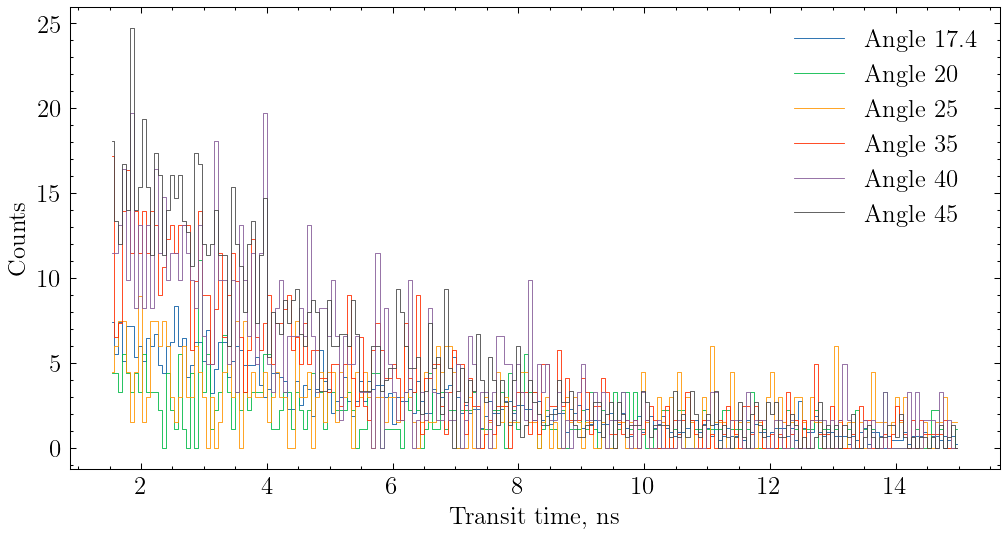

In [13]:
filenames = [i[2] for i in os.walk(".") if i[0] == "./data"][0]
filenames.sort(key = lambda x : float(x.split("_")[0]))

counts_data = {}

for name in filenames:
    filename = "data/" + name
    angle = name.split("_")[0]
    df = get_df_from_filename(filename)
    
    time = df["time"]
    counts = df["counts"] * 3600 / exposure_time[angle]
    
    plt.step(time, counts, where="mid", lw=.4, label=f"Angle {angle}")
    # plt.plot(df["time"], df["counts"], lw=.3, label=f"Angle {angle}")
    
    counts_data[angle] = counts

# plt.xscale("log")
    
plt.xlabel("Transit time, ns")
plt.ylabel("Counts")
plt.legend()

plt.savefig("all.png")
plt.show()

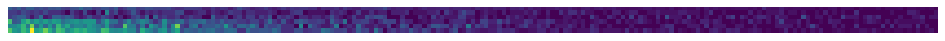

In [7]:
plt.imshow(counts_data.values())
plt.axis('off')

plt.savefig("heatmap.png")
plt.show()

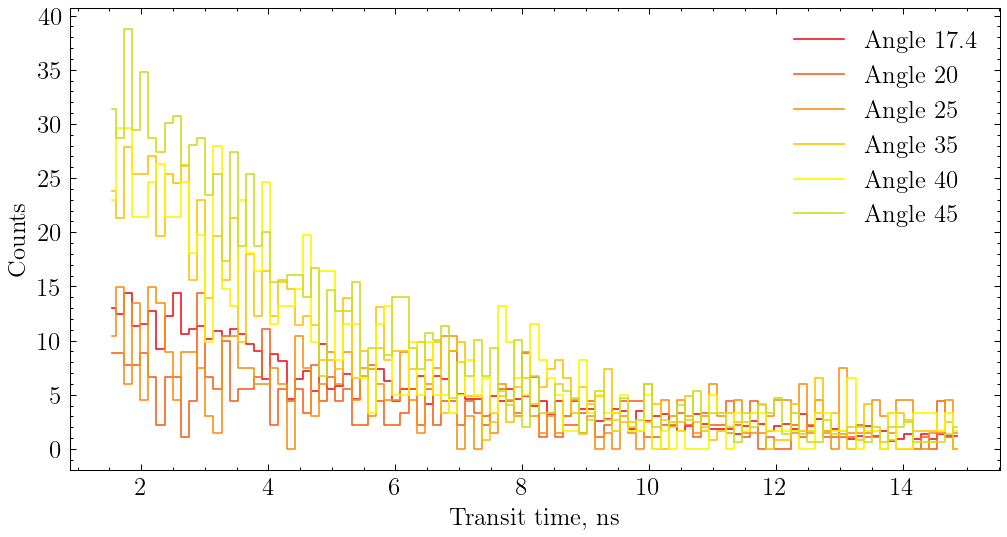

In [14]:
for angle, counts in counts_data.items():
    t = np.array(time)[:-1:2]
    c = np.array(counts)
    c2 = c[1::2] + c[:-1:2]
    
    plt.step(t, c2, where="mid", lw=.8, label=f"Angle {angle}", color=colors[angle])

# plt.xscale('log')
    
plt.xlabel("Transit time, ns")
plt.ylabel("Counts")
plt.legend()

plt.savefig("all_c2.png")
plt.show()

In [15]:
counts_data["45"]

23     18.046788
24     13.367991
25     12.031192
26     16.709989
27     14.036391
         ...    
229     1.336799
230     0.000000
231     0.668400
232     1.336799
233     0.000000
Name: counts, Length: 211, dtype: float64

In [ ]:
import BayesPowerlaw as bp

data_dir = os.path.dirname(os.path.abspath(__file__)) + '/examples/data'
data = np.loadtxt(data_dir + '/tweet_count.txt')

fit=bp.bayes(data)

plt.figure(figsize=(6, 4))
fit.plot_fit(np.mean(fit.gamma_posterior[0]), fit_color='black', scatter_size=100,
                  data_color='gray', edge_color='black', line_width=2)
plt.ylim(10**-5, 10**0)
plt.xlabel('likes')
plt.ylabel('frequency')
plt.title('Likes per Tweet')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
fit.plot_posterior(fit.gamma_posterior[0], range=[1.6, 1.9], color='blue')
plt.xlabel('exponent')
plt.ylabel('posterior')
plt.title('Posterior for Likes per Tweet')
plt.tight_layout()
plt.show()

Running /home/glebi/miniconda3/lib/python3.10/site-packages/BayesPowerlaw/src/../examples/scripts/tweets.py:
-------------------------------------------------------------
import BayesPowerlaw as bp
import numpy as np
import matplotlib.pyplot as plt
import os

data_dir = os.path.dirname(os.path.abspath(__file__)) + '/examples/data'
data = np.loadtxt(data_dir + '/tweet_count.txt')

fit=bp.bayes(data)

plt.figure(figsize=(6, 4))
fit.plot_fit(np.mean(fit.gamma_posterior[0]), fit_color='black', scatter_size=100,
                  data_color='gray', edge_color='black', line_width=2)
plt.ylim(10**-5, 10**0)
plt.xlabel('likes', fontsize=16)
plt.ylabel('frequency', fontsize=16)
plt.title('Likes per Tweet', fontsize=18)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
fit.plot_posterior(fit.gamma_posterior[0], range=[1.6, 1.9], color='blue')
plt.xlabel('exponent', fontsize=16)
plt.ylabel('posterior', fontsize=16)
plt.title('Posterior for Likes per Tweet', fontsize=18)
plt.tight_layout()

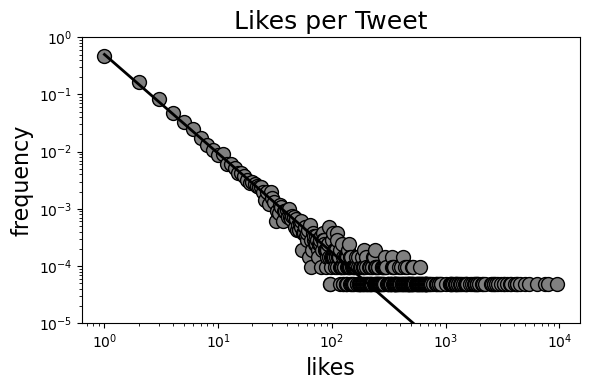

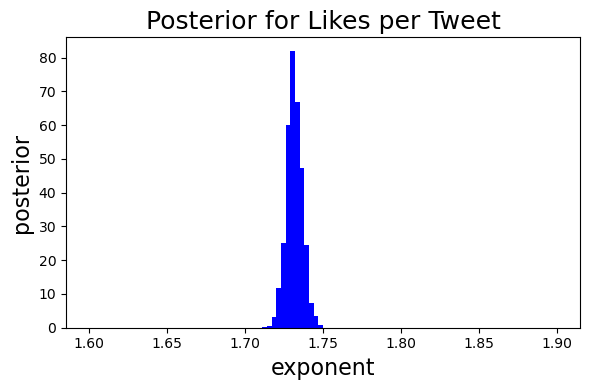

In [1]:
import BayesPowerlaw as bp
bp.demo()